In [40]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sqlite3
from pathlib import Path as Path 

In [3]:
office_viewership_df = pd.read_csv("the_office_viewership.csv")

In [4]:
office_viewership_df.head(3)

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein


In [5]:
del office_viewership_df["Unnamed: 0"]

In [6]:
del office_viewership_df["About"]

In [7]:
office_viewership_df.dtypes

Season            int64
EpisodeTitle     object
Ratings         float64
Votes             int64
Viewership      float64
Duration          int64
Date             object
GuestStars       object
Director         object
Writers          object
dtype: object

In [8]:
office_viewership_df['Duration'].nunique()

13

In [9]:
office_viewership_df['Director'].nunique()

54

In [10]:
office_viewership_df["Duration"] = office_viewership_df["Duration"].astype('category')

In [17]:
Path('the_office_ratings.db').touch()

In [18]:
conn = sqlite3.connect('the_office_ratings.db')
cursor = conn.cursor()

In [19]:
office_viewership_df.to_sql('the_office_ratings', conn, if_exists='append', index=False)

188

In [16]:
# Querying 

In [25]:
pd.read_sql('''
SELECT Writers, COUNT(*) as number_ep
FROM the_office_ratings
GROUP BY Writers 
ORDER BY number_ep DESC
''', conn)

,Writers,number_ep
0,Mindy Kaling,20
1,B. J. Novak,15
2,Paul Lieberstein,13
3,Justin Spitzer,9
4,Greg Daniels,9
5,Brent Forrester,9
6,Jennifer Celotta,8
7,Gene Stupnitsky | Lee Eisenberg,8
8,Michael Schur,7
9,Daniel Chun,7


In [23]:
avg_rating_by_writer = pd.read_sql('''
SELECT Writers, COUNT(*) as number_ep, AVG(Ratings) as avg_rating
FROM the_office_ratings
GROUP BY Writers 
HAVING COUNT(*) > 6 
ORDER BY avg_rating DESC
''', conn)

In [24]:
avg_rating_by_writer

,Writers,number_ep,avg_rating
0,Greg Daniels,9,8.755556
1,Michael Schur,7,8.514286
2,Gene Stupnitsky | Lee Eisenberg,8,8.487500
3,Paul Lieberstein,13,8.392308
4,B. J. Novak,15,8.340000
5,Brent Forrester,9,8.322222
6,Mindy Kaling,20,8.320000
7,Jennifer Celotta,8,8.300000
8,Justin Spitzer,9,8.200000
9,Daniel Chun,7,8.185714


Text(0, 0.5, 'Writer')

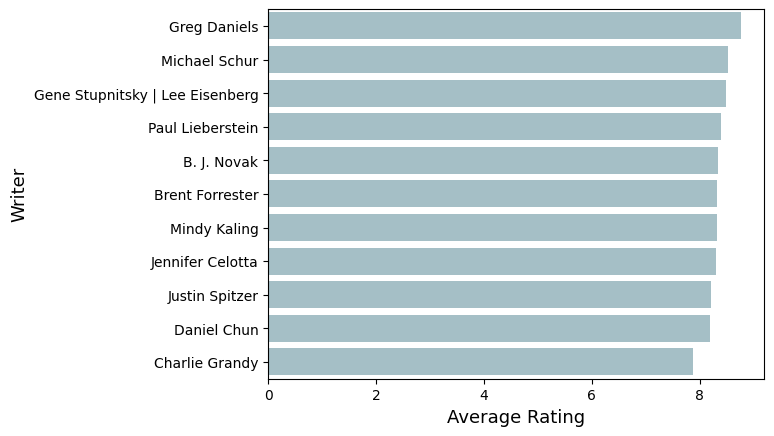

In [30]:
sns.barplot(y='Writers', x='avg_rating', data=avg_rating_by_writer, orient='h', color='#9FC2CC')
plt.xlabel('Average Rating', fontsize=13)
plt.ylabel('Writer', fontsize=13)

In [34]:
pd.read_sql('''
SELECT Writers, EpisodeTitle, Ratings
FROM the_office_ratings
WHERE Ratings>9
ORDER BY Ratings DESC
''', conn)

,Writers,EpisodeTitle,Ratings
0,Greg Daniels,"Goodbye, Michael",9.8
1,Greg Daniels,Finale,9.8
2,Paul Lieberstein,Stress Relief,9.7
3,Gene Stupnitsky | Lee Eisenberg,Dinner Party,9.5
4,Brent Forrester,A.A.R.M.,9.5
5,Steve Carell,Casino Night,9.4
6,Greg Daniels | Mindy Kaling,Niagara: Part 1,9.4
7,Greg Daniels | Mindy Kaling,Niagara: Part 2,9.4
8,B. J. Novak,Threat Level Midnight,9.4
9,Paul Lieberstein | Michael Schur,The Job,9.3


In [35]:
multiple_writers = pd.read_sql('''
SELECT 
Writers,
Ratings,
(CASE WHEN Writers LIKE '%|%' THEN 1 ELSE 0 END) as multiple_writers
FROM the_office_ratings
''', conn)

In [36]:
multiple_writers

,Writers,Ratings,multiple_writers
0,Ricky Gervais |Stephen Merchant and Greg Daniels,7.5,1
1,B. J. Novak,8.3,0
2,Paul Lieberstein,7.8,0
3,Michael Schur,8.1,0
4,Greg Daniels,8.4,0
...,...,...,...
183,Dan Sterling,8.0,0
184,Halsted Sullivan | Warren Lieberstein,8.0,1
185,Niki Schwartz-Wright,9.0,0
186,Brent Forrester,9.5,0


In [47]:
pd.read_sql('''
SELECT multiple_writers, 
COUNT(*) as frequency,
AVG(Ratings) as average_rating
FROM(
SELECT 
Writers,
Ratings,
(CASE WHEN Writers LIKE '%|%' THEN 1 ELSE 0 END) as multiple_writers
FROM the_office_ratings) as subquery
GROUP BY multiple_writers
''', conn)

,multiple_writers,frequency,average_rating
0,0,154,8.188312
1,1,34,8.458824


In [41]:
# Linear OLS Regression
y = multiple_writers['Ratings']
X = multiple_writers['multiple_writers']

model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Ratings   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     6.013
Date:                Tue, 25 Apr 2023   Prob (F-statistic):             0.0151
Time:                        10:53:58   Log-Likelihood:                -164.05
No. Observations:                 188   AIC:                             332.1
Df Residuals:                     186   BIC:                             338.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.1883      0.047  

In [ ]:
# Using multiple writers for an episode, increases the rating by 0.27

Text(0, 0.5, 'Rating')

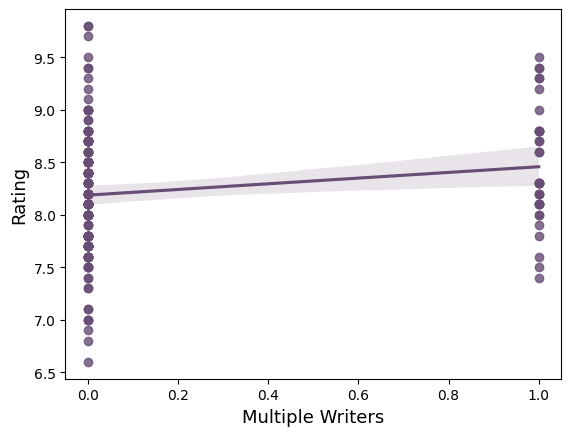

In [43]:
sns.regplot(x='multiple_writers', y='Ratings', data=multiple_writers, color="#694D75")
plt.xlabel('Multiple Writers', fontsize=13)
plt.ylabel('Rating', fontsize=13)

In [58]:
writers_each_season = pd.read_sql('''
SELECT Season, Writers, COUNT(*) as frequency
FROM the_office_ratings
GROUP BY Season, Writers
''',conn)

In [59]:
writers_each_season

,Season,Writers,frequency
0,1,B. J. Novak,1
1,1,Greg Daniels,1
2,1,Michael Schur,1
3,1,Mindy Kaling,1
4,1,Paul Lieberstein,1
...,...,...,...
115,9,Niki Schwartz-Wright,2
116,9,Owen Ellickson,2
117,9,Paul Lieberstein,1
118,9,Robert Padnick,1


In [63]:
unique_writers_each_season = pd.read_sql('''
SELECT Season, COUNT(DISTINCT Writers) as unique_frequency
FROM the_office_ratings
GROUP BY Season
''',conn)

In [64]:
unique_writers_each_season

,Season,unique_frequency
0,1,6
1,2,10
2,3,16
3,4,12
4,5,15
5,6,15
6,7,16
7,8,16
8,9,14


In [67]:
pd.read_sql('''
SELECT Writers, SUM(Viewership) as total_viewership, COUNT(*) as frequency
FROM the_office_ratings
GROUP BY Writers 
ORDER BY total_viewership DESC
''', conn)

,Writers,total_viewership,frequency
0,Mindy Kaling,154.81,20
1,Paul Lieberstein,111.99,13
2,B. J. Novak,110.12,15
3,Greg Daniels,66.30,9
4,Brent Forrester,66.14,9
5,Jennifer Celotta,65.22,8
6,Justin Spitzer,64.92,9
7,Gene Stupnitsky | Lee Eisenberg,62.97,8
8,Michael Schur,55.63,7
9,Daniel Chun,52.56,7


In [72]:
pd.read_sql('''
SELECT Writers as common_writers, AVG(Viewership) as average_viewership, COUNT(*) as frequency
FROM the_office_ratings
GROUP BY Writers 
HAVING COUNT(*) > 6
ORDER BY average_viewership DESC
''', conn)

,common_writers,average_viewership,frequency
0,Paul Lieberstein,8.614615,13
1,Jennifer Celotta,8.152500,8
2,Michael Schur,7.947143,7
3,Gene Stupnitsky | Lee Eisenberg,7.871250,8
4,Mindy Kaling,7.740500,20
5,Daniel Chun,7.508571,7
6,Greg Daniels,7.366667,9
7,Brent Forrester,7.348889,9
8,B. J. Novak,7.341333,15
9,Justin Spitzer,7.213333,9


In [73]:
pd.read_sql('''
SELECT Season, SUM(Viewership) as total_viewership, COUNT(*) as frequency
FROM the_office_ratings
GROUP BY Season
''', conn)

,Season,total_viewership,frequency
0,1,38.20,6
1,2,179.70,22
2,3,195.37,23
3,4,119.67,14
4,5,227.67,26
5,6,201.92,26
6,7,175.34,24
7,8,129.25,24
8,9,95.19,23


<Axes: xlabel='Ratings', ylabel='Count'>

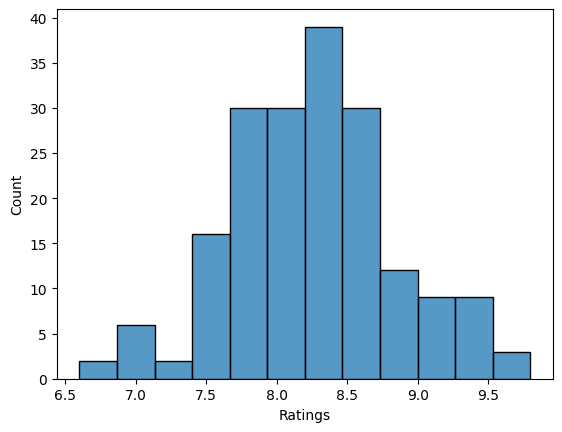

In [52]:
sns.histplot(data=office_viewership_df, x='Ratings')

Text(37.722222222222214, 0.5, 'Viewership (millions)')

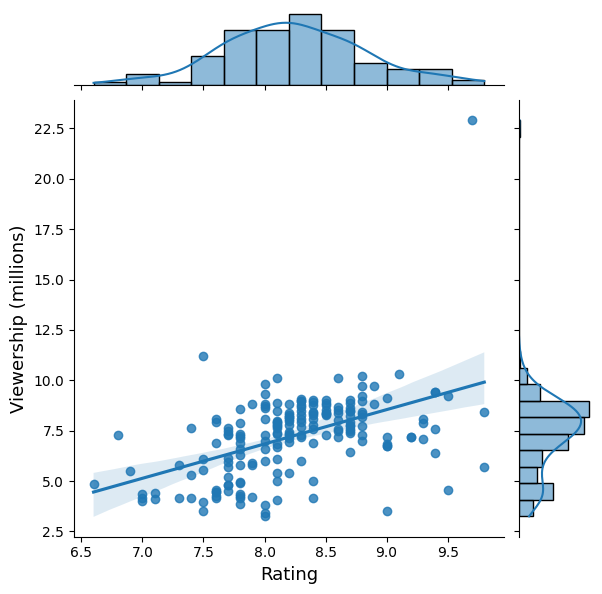

In [53]:
sns.jointplot(x='Ratings', y='Viewership', data=office_viewership_df, kind="reg")
plt.xlabel('Rating', fontsize=13)
plt.ylabel('Viewership (millions)', fontsize=13)

In [54]:
model = sm.OLS(office_viewership_df["Viewership"], sm.add_constant(office_viewership_df["Ratings"])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Viewership   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     57.68
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           1.45e-12
Time:                        11:01:01   Log-Likelihood:                -377.28
No. Observations:                 188   AIC:                             758.6
Df Residuals:                     186   BIC:                             765.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.7891      1.853     -3.664      0.0

In [ ]:
# An increase in a rating of 1, increases the viewrship by 1.7 million in the USA 

In [56]:
pd.read_sql('''
SELECT Season, AVG(Ratings) as avg_ratings, AVG(Viewership) as avg_viewership
FROM the_office_ratings
GROUP BY Season
''',conn)

,Season,avg_ratings,avg_viewership
0,1,7.966667,6.366667
1,2,8.440909,8.168182
2,3,8.586957,8.494348
3,4,8.564286,8.547857
4,5,8.488462,8.756538
5,6,8.196154,7.766154
6,7,8.308333,7.305833
7,8,7.604167,5.385417
8,9,7.913043,4.138696


Text(42.722222222222214, 0.5, 'Rating')

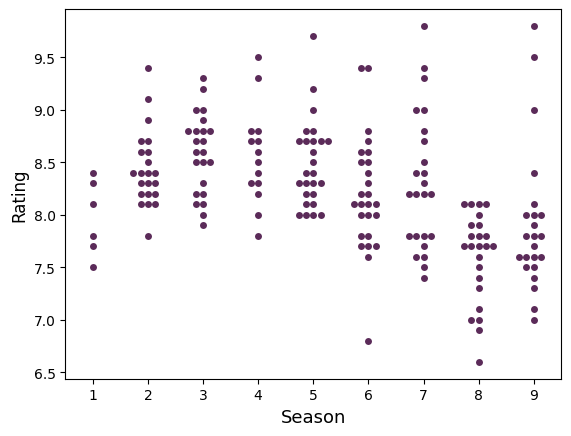

In [57]:
sns.swarmplot(data=office_viewership_df, x='Season', y='Ratings', color='#5B2B59')
plt.xlabel("Season", fontsize=13)
plt.ylabel("Rating", fontsize=12)

In [74]:
pd.read_sql('''
SELECT *
FROM the_office_ratings
WHERE Director=Writers
''',conn)

,Season,EpisodeTitle,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,1,Basketball,8.4,4294,5.00,23,19 April 2005,None,Greg Daniels,Greg Daniels
1,4,Fun Run,8.8,3635,9.70,42,27 September 2007,None,Greg Daniels,Greg Daniels
2,4,Money,8.7,3073,8.50,42,18 October 2007,None,Paul Lieberstein,Paul Lieberstein
3,6,Gossip,8.8,2866,8.20,30,17 September 2009,None,Paul Lieberstein,Paul Lieberstein
4,6,The Promotion,8.0,2344,7.28,30,1 October 2009,None,Jennifer Celotta,Jennifer Celotta
5,6,New Leads,7.7,2154,7.63,23,18 March 2010,None,Brent Forrester,Brent Forrester
6,7,Sex Ed,7.8,2209,7.36,30,14 October 2010,None,Paul Lieberstein,Paul Lieberstein
7,7,Michael's Last Dundies,9.0,3039,6.85,23,21 April 2011,None,Mindy Kaling,Mindy Kaling
8,9,New Guys,7.6,2074,4.28,23,20 September 2012,None,Greg Daniels,Greg Daniels
9,9,The Farm,7.5,2189,3.54,22,14 March 2013,None,Paul Lieberstein,Paul Lieberstein


In [76]:
pd.read_sql('''
SELECT *
FROM the_office_ratings
WHERE GuestStars!='None'
''',conn)

,Season,EpisodeTitle,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,1,Hot Girl,7.7,3854,4.80,23,26 April 2005,Amy Adams,Amy Heckerling,Mindy Kaling
1,2,Office Olympics,8.4,3665,8.30,22,4 October 2005,Nancy Carell,Paul Feig,Michael Schur
2,2,The Fire,8.4,3607,7.60,22,11 October 2005,Amy Adams,Ken Kwapis,B. J. Novak
3,2,The Client,8.6,3533,7.50,22,8 November 2005,Tim Meadows,Greg Daniels,Paul Lieberstein
4,2,E-Mail Surveillance,8.4,3338,8.10,23,22 November 2005,Ken Jeong,Paul Feig,Jennifer Celotta
5,2,Booze Cruise,8.6,3536,8.70,22,5 January 2006,Rob Riggle,Ken Kwapis,Greg Daniels
6,2,Valentine's Day,8.3,3104,8.95,22,9 February 2006,Conan O'Brien,Greg Daniels,Michael Schur
7,3,The Convention,8.2,3027,7.78,22,28 September 2006,Jerome Bettis,Ken Whittingham,Gene Stupnitsky | Lee Eisenberg
8,4,Launch Party,8.4,2844,8.91,42,11 October 2007,Kevin McHale,See full summary,Jennifer Celotta
9,5,Business Ethics,8.3,2654,8.99,22,9 October 2008,Wendi McLendon-Covey,Jeffrey Blitz,Ryan Koh


In [79]:
pd.read_sql('''
SELECT guest_star,
AVG(Ratings) as avg_ratings, 
COUNT(*) as frequency
FROM (
SELECT 
Ratings, 
(CASE WHEN GuestStars!='None' THEN 1 ELSE 0 END) as guest_star
FROM the_office_ratings) as subquery
GROUP BY guest_star
''',conn)

,guest_star,avg_ratings,frequency
0,0,8.244654,159
1,1,8.196552,29


In [80]:
model = sm.OLS(office_viewership_df["Votes"], sm.add_constant(office_viewership_df["Ratings"])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Votes   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     136.1
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           5.85e-24
Time:                        11:17:28   Log-Likelihood:                -1524.8
No. Observations:                 188   AIC:                             3054.
Df Residuals:                     186   BIC:                             3060.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6812.3019    829.210     -8.215      0.0

Text(0, 0.5, 'Votes')

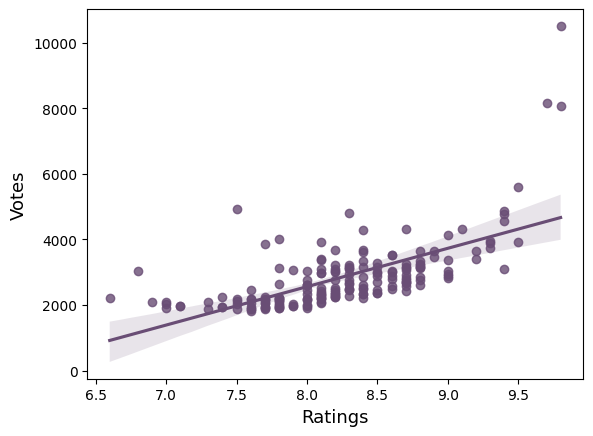

In [82]:
sns.regplot(x='Ratings', y='Votes', data=office_viewership_df, color="#694D75")
plt.xlabel('Ratings', fontsize=13)
plt.ylabel('Votes', fontsize=13)